In [2]:
from pathlib import Path
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
EXP_DIR = Path("logs-new/100_rank50_splitReplFirstHalf__ftTo130-3_camRegNoBug/cameras")

all_intrinsics = []
all_poses = []
for cameras_filename in list(EXP_DIR.iterdir()):
    cameras = torch.load(cameras_filename, map_location='cpu')
    all_intrinsics.append(cameras['intrinsics'])
    all_poses.append(cameras['extrinsics'])

all_intrinsics = torch.stack(all_intrinsics)
all_poses = torch.stack(all_poses)

Text(0.5, 1.0, 'Camera positions, 3-view (red = object; colormap = iteration number)')

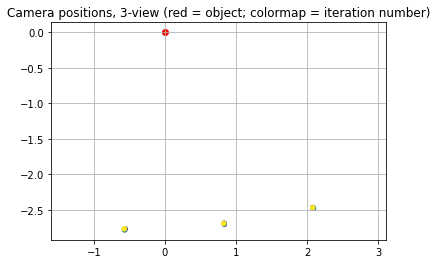

In [16]:
positions = all_poses[::3, :, :3, 3] # n_iters x n_cams x 3
iter_number = torch.arange(len(positions))[..., None].expand(positions[..., 0].shape) # n_iters x n_cams
positions_2d = positions[:, :, 0:3:2] # n_iters x n_cams x 2
positions_2d_flattened = positions_2d.reshape(-1, 2) # n_iters*n_cams x 2
plt.scatter(*positions_2d_flattened.T, c=iter_number.reshape(-1), s=20)
plt.scatter(0, 0, c='red')
plt.axis('equal')
plt.grid()
plt.title(f"Camera positions, {positions.shape[1]}-view (red = object; colormap = iteration number)")